# No-show Appointments

Questions for Analysis


1)What is the relationship between Age and Showup?

2) What are other factors that may affect appointment noshow

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.express as pex
import plotly.offline as poff
%matplotlib inline

# Wrangling

In [2]:
df=pd.read_csv('noshowappointments.csv')

In [3]:
#exploring data
df.head()

PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841186e+12        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0             0      No  
1         0           0        0             0      No  
2         0           0        0             0      No  
3         0           0        0             0      No  
4         1           0        0             0      No

In [4]:
#exploring general characteristics(number of columns & rows,data types,missing values,etc.) of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


There is a total of 110527 patients data contained in this dataframe, distributed across 14 columns.
There are no missing data in this dataset.

In [5]:
#exploring statistical summary of the dataset
df.describe()

PatientId  AppointmentID            Age    Scholarship  \
count  1.105270e+05   1.105270e+05  110527.000000  110527.000000   
mean   1.474963e+14   5.675305e+06      37.088874       0.098266   
std    2.560949e+14   7.129575e+04      23.110205       0.297675   
min    3.921784e+04   5.030230e+06      -1.000000       0.000000   
25%    4.172614e+12   5.640286e+06      18.000000       0.000000   
50%    3.173184e+13   5.680573e+06      37.000000       0.000000   
75%    9.439172e+13   5.725524e+06      55.000000       0.000000   
max    9.999816e+14   5.790484e+06     115.000000       1.000000   

        Hipertension       Diabetes     Alcoholism        Handcap  \
count  110527.000000  110527.000000  110527.000000  110527.000000   
mean        0.197246       0.071865       0.030400       0.022248   
std         0.397921       0.258265       0.171686       0.161543   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       4.000000   

        SMS_received  
count  110527.000000  
mean        0.321026  
std         0.466873  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         1.000000  
max         1.000000

1) The mean age of patients in the dataset is 37, with the Oldest patient being a 115 and the youngest -1. As it is not possible for a human to have age as -1, the row with the anomaly will be find consequently dropped.
2) The max value of Handicap(4) does not tally with the binary order of data collection for the variable, this indicates an error in the collected data.


In [6]:
#check for and drop row with age of -1
df.query('Age==-1')
df.drop(index=99832,inplace=True)

In [7]:
#Check for Columns with missing values

print('Total missing values:',df.isna().sum())

Total missing values: PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64


There are no missing value(s) in the dataset

In [8]:
#Rename mispelt column names
df.rename(columns={'Handcap':'Handicap','Hipertension':'Hypertension'},inplace=True)
df.head()

PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841186e+12        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hypertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handicap  SMS_received No-show  
0         0           0         0             0      No  
1         0           0         0             0      No  
2         0           0         0             0      No  
3         0           0         0             0      No  
4         1           0         0             0      No


Observed that 2 columns were not spelt correctly so i proceeded to have them corrected for easy understanding

In [9]:
#Dropping duplicated Patient Ids which have duplicated No_show data as this may deviate our accuracy, rows with duplicate PatientID but different noshow entry will be kept.
df.drop_duplicates(['PatientId','No-show'],inplace=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 71816 entries, 0 to 110524
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PatientId       71816 non-null  float64
 1   AppointmentID   71816 non-null  int64  
 2   Gender          71816 non-null  object 
 3   ScheduledDay    71816 non-null  object 
 4   AppointmentDay  71816 non-null  object 
 5   Age             71816 non-null  int64  
 6   Neighbourhood   71816 non-null  object 
 7   Scholarship     71816 non-null  int64  
 8   Hypertension    71816 non-null  int64  
 9   Diabetes        71816 non-null  int64  
 10  Alcoholism      71816 non-null  int64  
 11  Handicap        71816 non-null  int64  
 12  SMS_received    71816 non-null  int64  
 13  No-show         71816 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 8.2+ MB


We are now left with 71816 patients out of 110524 after dropping duplicated patient ids which also had duplicated Noshow value

In [10]:
#Convert Yes & No in the No_show column to 1 & 0 respectively.

df['No-show'] = df['No-show'].map({'Yes':1,'No':0})

df.head()

PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841186e+12        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hypertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handicap  SMS_received  No-show  
0         0           0         0             0        0  
1         0           0         0             0        0  
2         0           0         0             0        0  
3         0           0         0             0        0  
4         1           0         0             0        0

I converted the Yes, No values in the No-show column to binary for easier statistical description

### Summary

After data was gathered from the CSV file, the first 5 rows were explored to see the general characteristics of the dataset, then we checked to see if the dataset has missing values, then the descriptive statistical summary of the dataset was explored to see the mean,min,max,etc of our data where i discovered that the minimum age in the dataset is -1,which is an impossiblity so the affected row will be subsequently dropped; then checked for missing data and found none, I then proceeded to rename mispelt column names for easy understanding and finally converted values in the No-show column to binary.

# Exploratory Data Analysis 

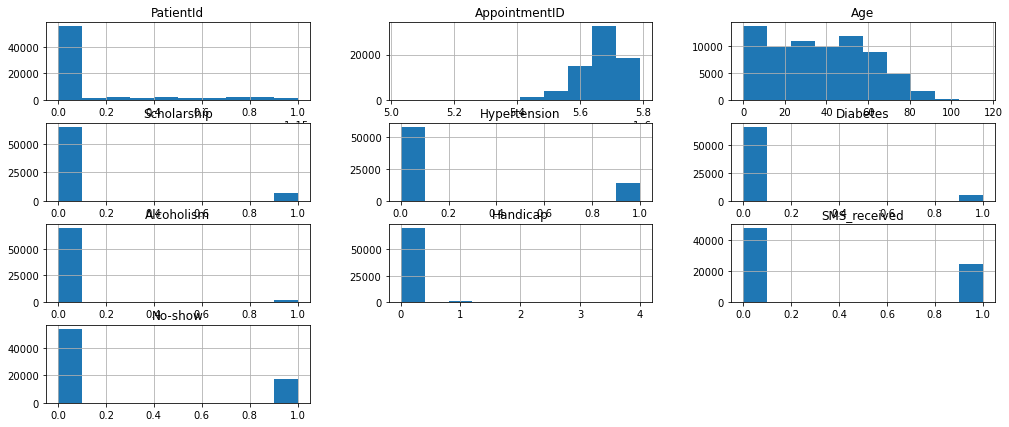

In [11]:
df.hist(figsize=(17,7));

A histogram of the dataset to give us a visual outlook of the columns.
1) Majority of the patients do not suffer from terminal diseases, with hypertension being the highest illness suffered.
2) Though most of the patients did not receive SMS on appointents,nearly half of the patients received sms on appointents 

In [12]:
#Splitting the dataframe into 2 parts based on Appearance(Show & No show)

df_show =df['No-show']==1
df_Noshow=df['No-show']==0


In [13]:
#Total number of patients who show up
df[df_show].count()

PatientId         17663
AppointmentID     17663
Gender            17663
ScheduledDay      17663
AppointmentDay    17663
Age               17663
Neighbourhood     17663
Scholarship       17663
Hypertension      17663
Diabetes          17663
Alcoholism        17663
Handicap          17663
SMS_received      17663
No-show           17663
dtype: int64

In [14]:
#Total number of patients who don't sow up to their appointment
df[df_Noshow].count()

PatientId         54153
AppointmentID     54153
Gender            54153
ScheduledDay      54153
AppointmentDay    54153
Age               54153
Neighbourhood     54153
Scholarship       54153
Hypertension      54153
Diabetes          54153
Alcoholism        54153
Handicap          54153
SMS_received      54153
No-show           54153
dtype: int64

Of the 71816 patients, 17663 of them showed up for their appointment which is 24.59%, with 75.41% of them not showing up.This indicates a poor level of turnup to booked appointments.

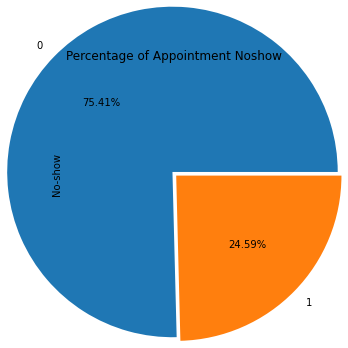

In [15]:
#plotting a pie chart to show the rate of appointment showup in percentage where 0 and 1 signifies patients who did not show and those who showed respectively.
df['No-show'].value_counts().plot(kind='pie',autopct='%1.2f%%', radius=1.9,explode=[0.03, 0.03],title='Percentage of Appointment Noshow')
plt.show()

# Influence of Age on Appointment Showup

In [16]:
#Finding the correlation between age and showing up to an appointment
corr=df['No-show'].corr(df['Age'])
print(corr) 

-0.05255323446460656


This shows that there is a negaative relationship between age and Showing up to an appointment, that is as age increases, the tendency to showup to appointments reduces.

In [17]:
#Average age of patients
df['Age'].mean()

36.527500835468416

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



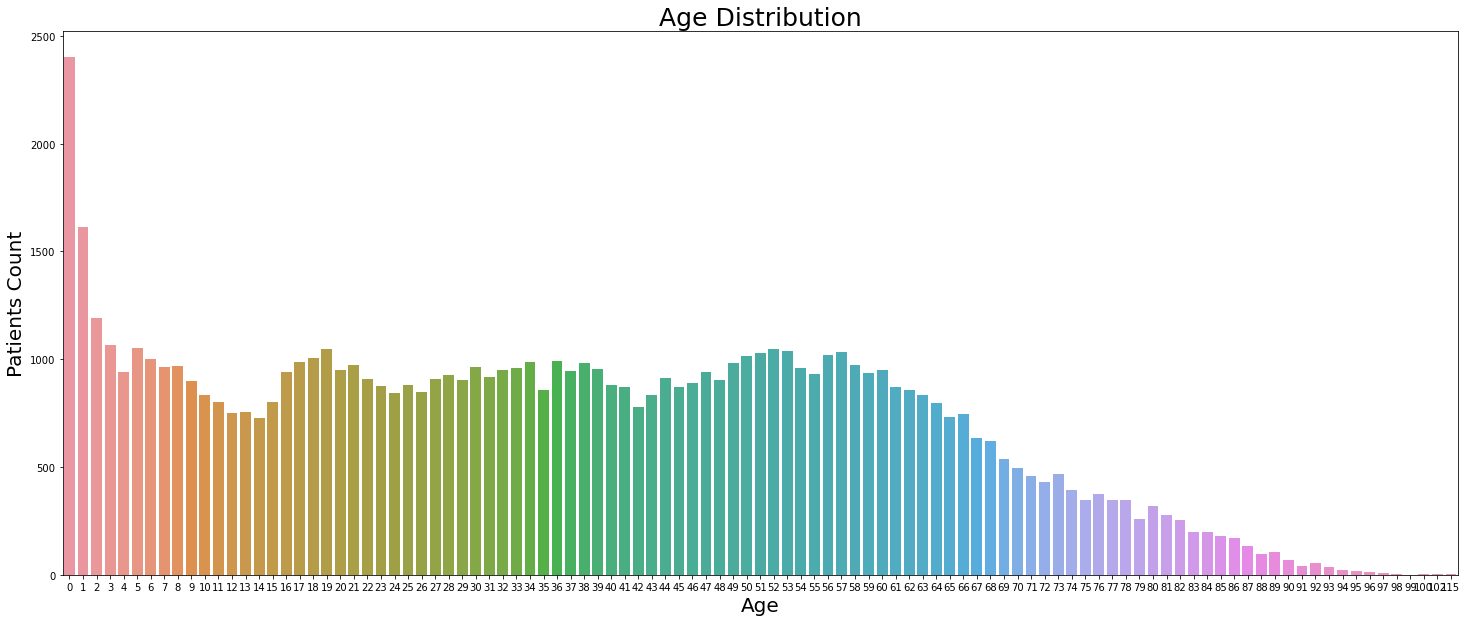

In [18]:
#plotting a chart of Age distribution

age = df['Age'].value_counts()
age[:]
plt.figure(figsize=(25,10))
sns.barplot(age.index,age.values)
plt.title('Age Distribution',fontsize=25)
plt.ylabel('Patients Count',fontsize=20)
plt.xlabel('Age', fontsize=20)
plt.show()

There are more young people than there are elderly people in the dataset with the mean age bring 37.5 the mean age, indicating a certain level of youthfulness

In [19]:
#checking the average age of who showup to appointments
df[['Age','No-show']].groupby('No-show').mean()

Age
No-show           
0        37.229166
1        34.376267

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



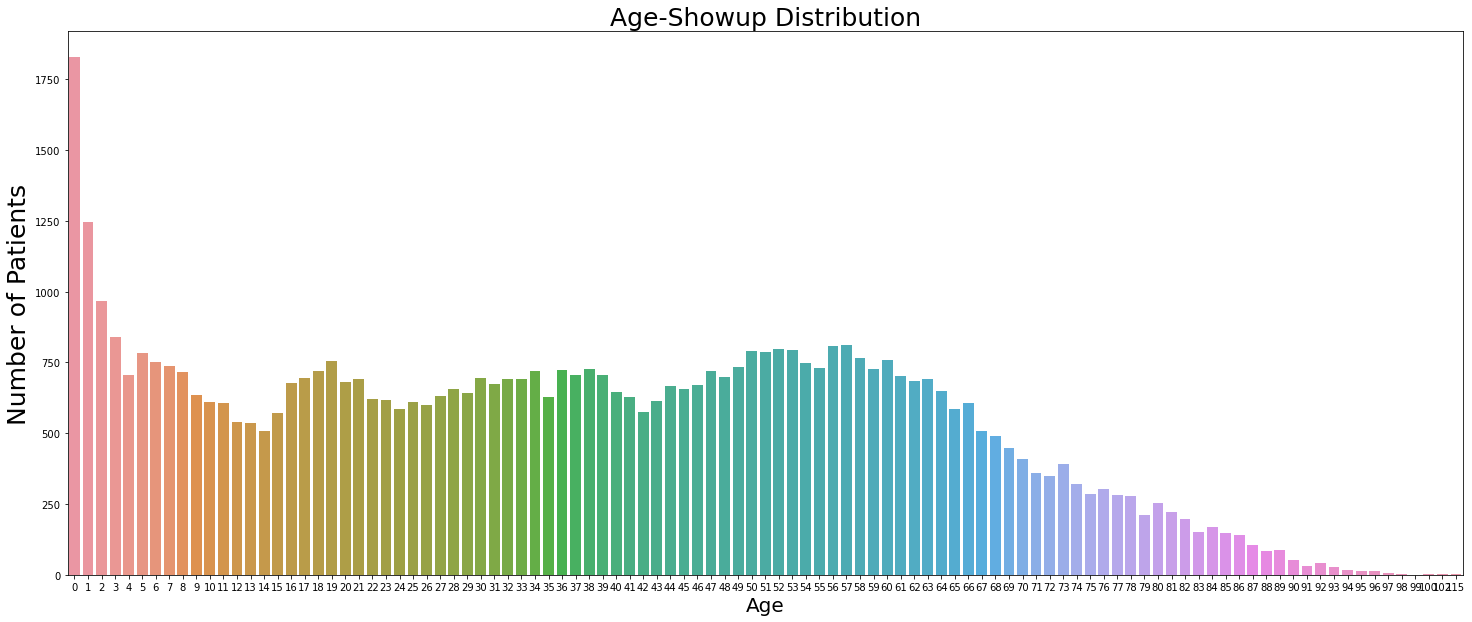

In [20]:
#plotting a chart of how each age group show up to appointments
agebracket=df.Age[df_Noshow].value_counts()
agebracket[:]
plt.figure(figsize=(25,10))
sns.barplot(agebracket.index,agebracket.values)
plt.title('Age-Showup Distribution',fontsize=25)
plt.ylabel('Number of Patients',fontsize=25)
plt.xlabel('Age', fontsize=20)
plt.show()

The figure above shows Age distribution in relation to Noshow, that is how each Age or Age bracket do not show up to appointments.

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



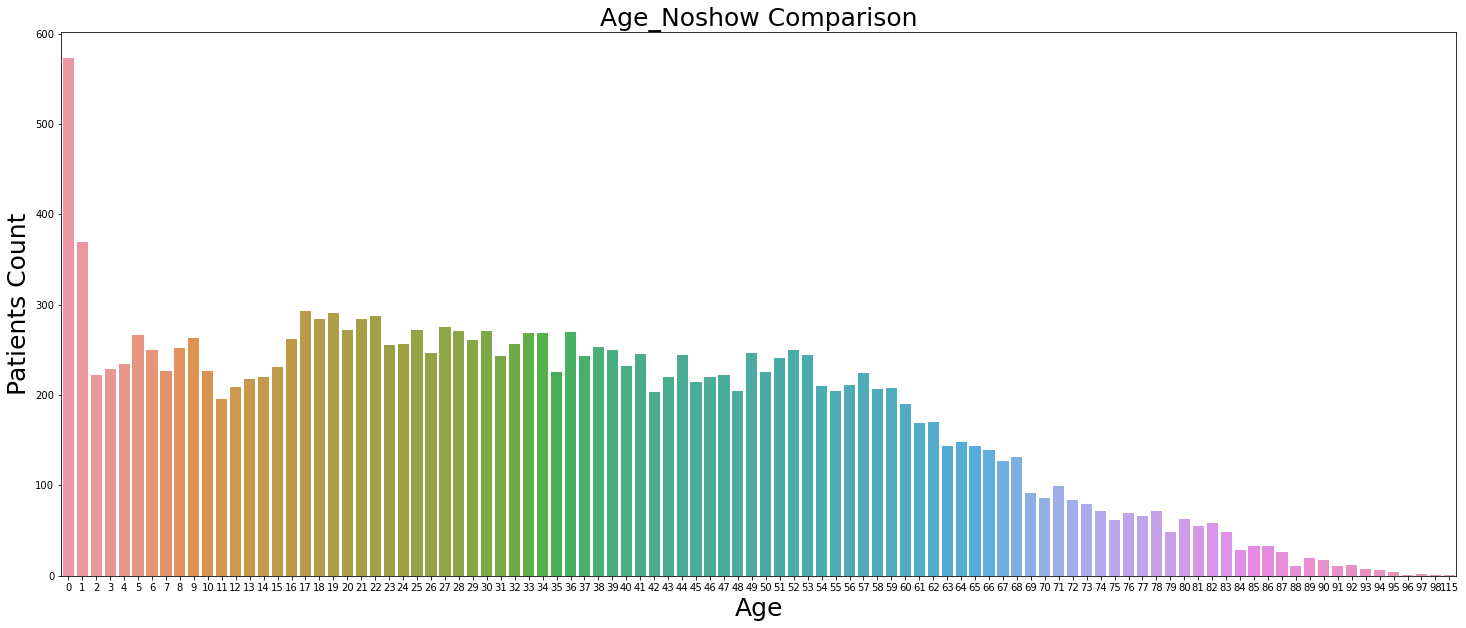

In [21]:
#plotting an Age-No show distribution
agegroup=df.Age[df_show].value_counts()
agegroup[:]
plt.figure(figsize=(25,10))
sns.barplot(agegroup.index,agegroup.values)
plt.title('Age_Noshow Comparison',fontsize=25)
plt.ylabel('Patients Count',fontsize=25)
plt.xlabel('Age', fontsize=25)
plt.show()

As seen in the chart and also given by the mean ages of No show, it is therefore observed that the younger ones have the tendency of showing up totheir appointments than the elderly, this can be vaguely attributed to parental care as children from 1-20 are those who show up more as seen in the chart above

# Relationship between Age and Hypertension

In [22]:
#Checking descriptive stats of Age and Hypertension
df[['Age','Hypertension']].groupby('Hypertension').aggregate(['mean','min','max'])

Age         
                   mean min  max
Hypertension                    
0             30.596658   0  115
1             61.000642   4  115

<Figure size 1800x2160 with 0 Axes>

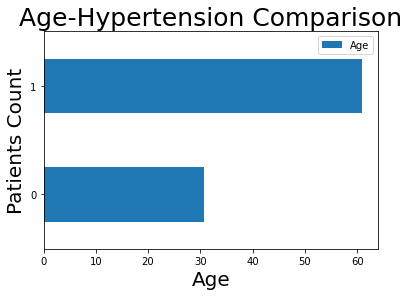

In [23]:
 #Plotting a chart of hypertensive age mean 
age_hyper = df[['Age','Hypertension']].groupby('Hypertension').mean()
age_hyper[:]
plt.figure(figsize=(25,30))
age_hyper.plot(kind='barh')
plt.title('Age-Hypertension Comparison',fontsize=25)
plt.ylabel('Patients Count',fontsize=20)
plt.xlabel('Age', fontsize=20)
plt.show()

This figure shows the mean age of Patients that are either Hypertensive or not; From the figure,30.59 is the average age of patients who do not have Hypertension and 61 years is the average of those Hypertensive.


# Relationship between Age and Diabetes

In [24]:
df[['Age','Diabetes']].groupby('Diabetes').aggregate(['mean','min','max'])

Age         
               mean min  max
Diabetes                    
0         34.620069   0  115
1         61.500785   1   99

<Figure size 1800x2160 with 0 Axes>

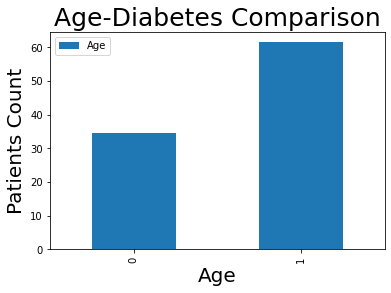

In [25]:
 #Plotting a chart of Diabetic age mean 
age_diab = df[['Age','Diabetes']].groupby('Diabetes').mean()
plt.figure(figsize=(25,30))
age_diab.plot(kind='bar')
plt.title('Age-Diabetes Comparison',fontsize=25)
plt.ylabel('Patients Count',fontsize=20)
plt.xlabel('Age', fontsize=20)
plt.show()

 It is observed here that age plays a big part in terminal diseases amongst patients as the older one gets the higher the chances of having a terminal illness, this is because the average age of patients with diabetes and hypertension are 61.5 and 61 respectively. It is also seen  through the minimum age that babies can also go down with terminal diseases.

## Influence of Gender on Appointment

In [26]:
#Convert M signifying Male, and F signifying Female to binary- 1 & 0 respectively
df.Gender=df.Gender.map(lambda Gender:1 if Gender=='M'else 0)


In [27]:
#Checking the number of male and female patients(1 as males and 0 as females) 
df['Gender'].value_counts()

0    46466
1    25350
Name: Gender, dtype: int64

In [28]:
#Number of each gender that showed up to their appointments (1 as males and 0 as females)
df.Gender[df_show].value_counts()

0    11506
1     6157
Name: Gender, dtype: int64

In [29]:
#Number of each gender that did not show up to their appointments
df.Gender[df_Noshow].value_counts()

0    34960
1    19193
Name: Gender, dtype: int64

<AxesSubplot:title={'center':' '}, ylabel='Gender'>

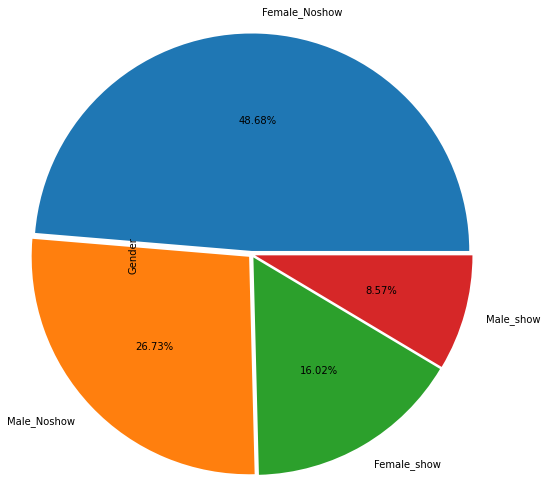

In [30]:
#Plotting the distribution of gender 
my_labels= ['Female_Noshow', 'Male_Noshow', 'Female_show', 'Male_show']
plt.title(' ')
df.Gender.groupby(df_show).value_counts().plot(kind='pie',autopct='%1.2f%%', radius=2.5, labels= my_labels,explode =[0.04,0.04,0.04,0.04])


Analysis shows that Females are the majority of the patients who booked at an appointment. 
However,16.02% percent of Females showup to thwir appointments,while 8.57% of Males showup to their appointments, therefore Females have a higher rate of Showing up to appointments than their Male counterparts

### Influence of Terminal Illnesses on Appointment Showup

# Hypertension

In [31]:
#Checking Number of patients diagnosed with hypertension
df['Hypertension'].value_counts()

0    57807
1    14009
Name: Hypertension, dtype: int64

In [32]:
#Number of patients diagnosed with hypertension who showed up to their appointment
df.Hypertension[df_show].value_counts()

0    14644
1     3019
Name: Hypertension, dtype: int64

In [33]:
#Number of patients  diagnosed with hypertension who do not show up to their appointment
df.Hypertension[df_Noshow].value_counts()

0    43163
1    10990
Name: Hypertension, dtype: int64

In [34]:
#Assigning function for all columns to be plotted
class Appointment:
  def diabetes(self):
    #Plotting a chart to visualize how relationship diabtes and how it affects showup
    plt.figure(figsize=[15,9])
    df.Diabetes[df_show].plot(alpha=0.5,color='red',label='show',kind ='hist')
    df.Diabetes[df_Noshow].plot(alpha=0.4,color='blue',label='Noshow',kind= 'hist')
    plt.legend()
    plt.title('Diabetes Influence on Appointment Showup')
    plt.xlabel('Diabetes')
    plt.ylabel('Patients count');

  def alcoholism(self):
    #Plotting Visualization of Alcoholism  
    plt.figure(figsize=[15,9])
    df.Alcoholism[df_show].plot(alpha=0.5,color='red',label='show',kind='hist')
    df.Alcoholism[df_Noshow].plot(alpha=0.4,color='blue',label='show',kind='hist')
    plt.legend()
    plt.title('Alcoholism Influence on Appointment Showup')
    plt.ylabel('Patients count')
    plt.xlabel('Alcoholism');

  def hypertension(self):
    #Plotting a chart to visualize how patients with hypertrnsion respond to appointments
    plt.figure(figsize=[15,9])
    df.Hypertension[df_show].hist(alpha=0.5,color='red',label='show')
    df.Hypertension[df_Noshow].hist(alpha=0.4,color='blue',label='Noshow')
    plt.legend()
    plt.title('Hypertension Influence on Appointment Showup')
    plt.xlabel('Hypertension')
    plt.ylabel('Patients count');
    
  def sms(self):
    #plotting a chart to visualize sms effect on  appointment noshow
    plt.figure(figsize=[15,9])
    df.SMS_received[df_show].hist(alpha=0.5,color='red',label='show')
    df.SMS_received[df_Noshow].hist(alpha=0.4,color='blue',label='Noshow')
    plt.legend()
    plt.title('Relationsip Between SMS and Appointment Showup')
    plt.xlabel('SMS Received')
    plt.ylabel('Patients count');  
    
  def neighbourhood(self):
    plt.figure(figsize=[15,9])
    df.Neighbourhood[df_show].value_counts().plot(kind='bar',alpha=0.5,color='red',label='show')
    df.Neighbourhood[df_Noshow].value_counts().plot(kind='bar',alpha=0.4,color='blue',label='Noshow')
    plt.legend()
    plt.title('Relationsip Between Neighbourhood and Appointment Showup')
    plt.xlabel('Neighbourhood')
    plt.ylabel('Patients count');
    
ap=Appointment()

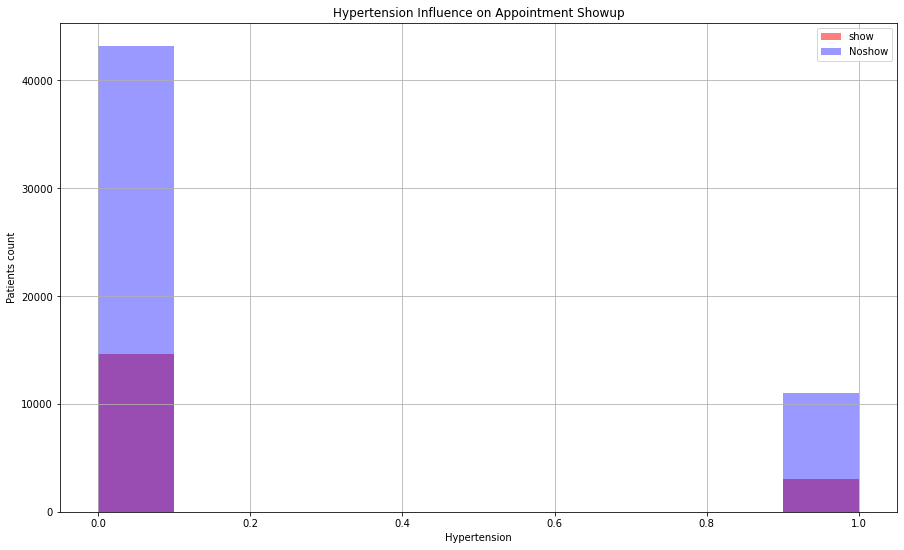

In [35]:
ap=Appointment()
ap.hypertension()

   Only 19.5% (14009) of the total number of patients(71816) are diagnosed with Hypertension, of this number (14009),21.41%(3019) turn up for thier appointents

# Diabetes

In [36]:
#Number of patients diagnosed with Diabetes(0 for those without and 1 for those with diabetes)
df['Diabetes'].value_counts()

0    66720
1     5096
Name: Diabetes, dtype: int64

In [37]:
#Number of patients with diabetes who show up to their appointmnet(Represented by 1)
df.Diabetes[df_show].value_counts()

0    16513
1     1150
Name: Diabetes, dtype: int64

In [38]:
#Number of patients with diabeyes who dont show up to their appointments(REpresented by 1)
df.Diabetes[df_Noshow].value_counts()

0    50207
1     3946
Name: Diabetes, dtype: int64

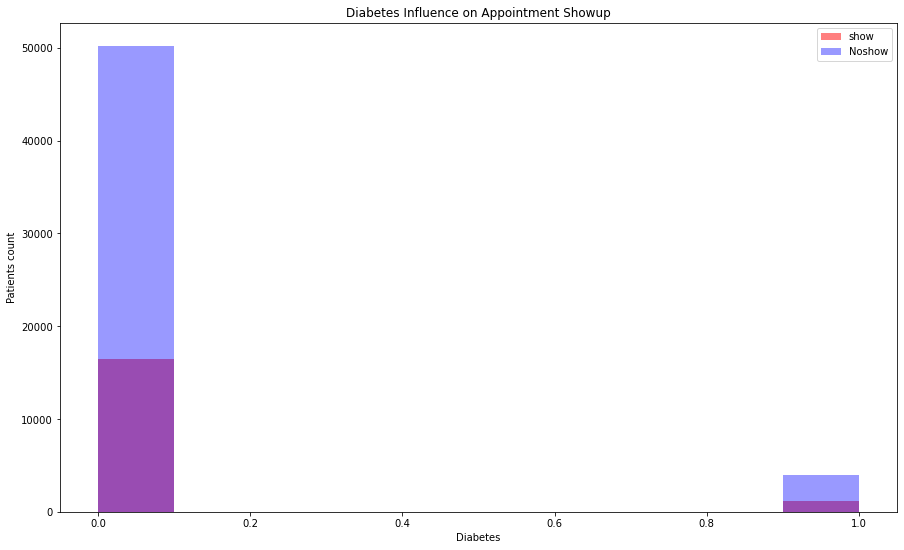

In [39]:
#plotting distribution of diabetes according to show and noshow
ap.diabetes()

only 5096 patients are diagnose with Diabetes with accounts for just 7.10% of the population; of this number,22.56% showup for appointments.

# Alcoholism

In [40]:
#Number of patients sick with alcoholism- 0 for patients who are not alcoholic and 1 for patients with alcoholism
df['Alcoholism'].value_counts()

0    70018
1     1798
Name: Alcoholism, dtype: int64

In [41]:
#Number of patients with alcoholism who show up to their appointments
df.Alcoholism[df_show].value_counts()

0    17143
1      520
Name: Alcoholism, dtype: int64

In [42]:
#Number of patients with alcoholism who do not show up to appointments
df.Alcoholism[df_Noshow].value_counts()

0    52875
1     1278
Name: Alcoholism, dtype: int64

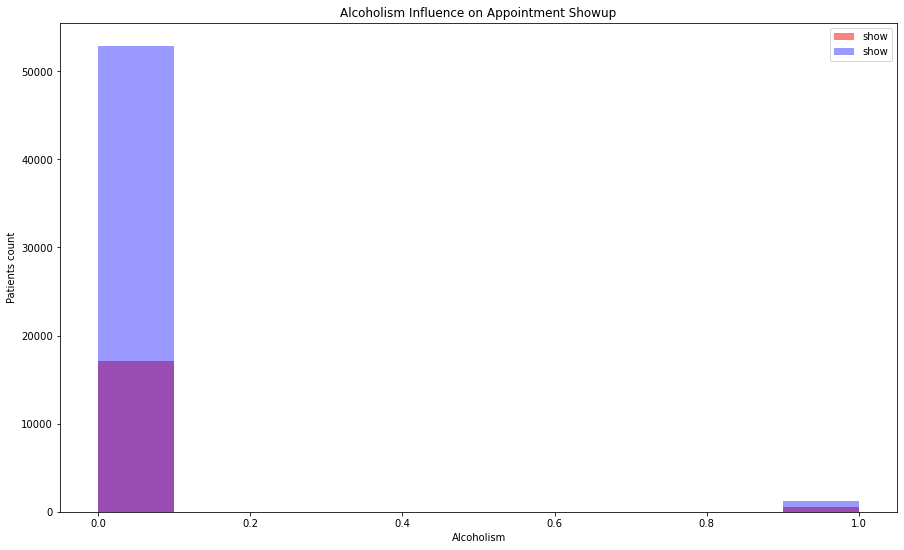

In [43]:
#Plotting Visualization of Alcoholism  
ap.alcoholism()

  it is observed that 1798 of 71816 patients are sick with Alcoholism with only 520 of them showing up to appointments

# Handicapped

In [44]:
#Checking number of patients handiapped
df['Handicap'].value_counts()

0    70511
1     1178
2      116
3        8
4        3
Name: Handicap, dtype: int64

The column Handicap cannot be visually presented beacuse values in the column do not follow the Binary order of  1 & 0 which indicates if a patient is handicapped or not,respectively; but we can observe  from th 0 count that 70511 out of 71816 patients are handicapped, therefore leaving the number of andicapped patients to be 1305(1.82% of the patients).

# Influence of Received SMS on Appointment Showup

In [45]:
#Number of patients who received sms notification of appointment(0 & 1 representing those who did not receive and
#those who received respectively)
df['SMS_received'].value_counts()

0    47717
1    24099
Name: SMS_received, dtype: int64

In [46]:
#Checking the number of patients who showed up  and if they received sms to their appointments
df.SMS_received[df_show].value_counts()

0    9660
1    8003
Name: SMS_received, dtype: int64

In [47]:
#checking number of patients who did not show and if they received sms
df.SMS_received[df_Noshow].value_counts()

0    38057
1    16096
Name: SMS_received, dtype: int64

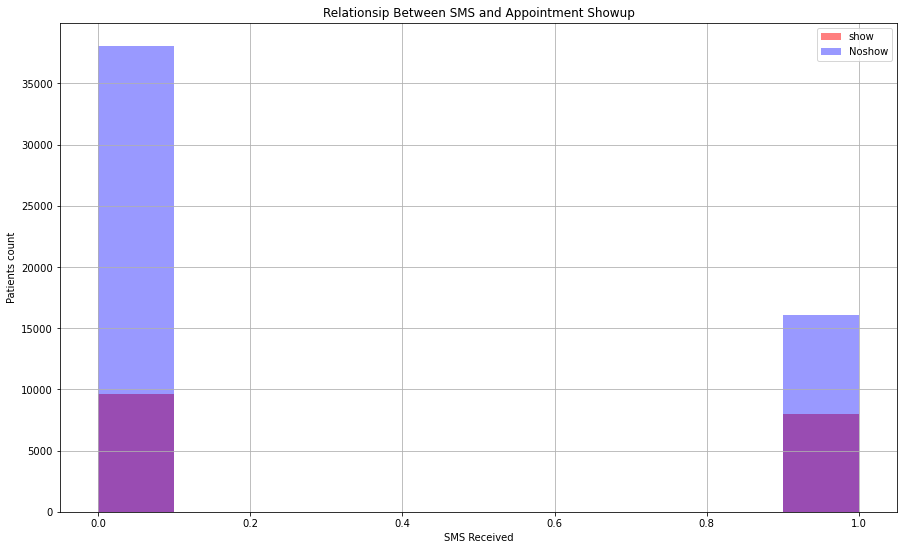

In [48]:
ap.sms()

Analysed data showss that majority of the patients do not receive SMS, with 33.56% receiving the SMS,with the rate of showup being 33.21% amongst patients who receive sms. However,only 20.24% of patients who don't receive SMS show up. Therefore, Sending SMS should be encourged.

# Conclusion

1) Age has a heavy influence on showing up with rate of showup higher at the earlier stages of life than at the latter, this can be suggested as the reason why majority of adults have one terminal disease or the other and emphasis should be placed on making sure they take appointments seriously.

2) Terminal diseases do not have an effect on the rate of showup.

3) Number of patients who do not receive SMS are greater than those who do, but the rate of showup is higher for those who do get SMS, so more sms should be sent out.

4) No clear relationship between gender and Neighbourhood on the rate of showup.

5) Neighbourhood's influence on appointment noshow is not exactly known as proximity to the hospital should be taken into consideration.

# Limitations

Little sense was made from the handicap column which had 5 unique variables instead of 2 which hindered Alcoholism being thoroughly analysed and visualized.